In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv


# Machine Predictive Maintenance Classification Dataset
Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in the industry to the best of our knowledge.

The dataset consists of 10 000 data points stored as rows with 14 features in columns

- `UID`: unique identifier ranging from 1 to 10000
- `productID`: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
- `air temperature [K]`: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
- `process temperature [K]`: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
- `rotational speed [rpm]`: calculated from powepower of 2860 W, overlaid with a normally distributed noise
- `torque [Nm]`: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
- `tool wear [min]`: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a 'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.

## Important : There are two Targets - Do not make the mistake of using one of them as feature, as it will lead to leakage.
- Target : Failure or Not
- Failure Type : Type of Failure

In [3]:
import pandas as pd
data = pd.read_csv("/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv")
data.sample(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9523,9524,L56703,L,299.0,310.2,1494,40.6,67,0,No Failure
2888,2889,M17748,M,300.6,309.6,1365,50.0,70,0,No Failure
5693,5694,M20553,M,302.4,311.8,1453,42.1,105,0,No Failure
7289,7290,L54469,L,300.3,310.6,1433,53.8,86,0,No Failure
7120,7121,L54300,L,300.9,310.5,2288,16.1,85,0,No Failure


In [4]:
data = data.drop(['UDI','Product ID'],axis=1)
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


## 2. Descriptive Statistics

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


In [6]:
data.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


### Breakdown:

1. **Air temperature [K]**:
   - **Mean**: 300.00 K, indicating the average air temperature is around 300 Kelvin.
   - **Range**: The minimum is 295.3 K, and the maximum is 304.5 K, with a **standard deviation** (std) of 2.0 K. This shows that the air temperature is fairly stable with little variation.

2. **Process temperature [K]**:
   - **Mean**: 310.01 K, which is slightly higher than the air temperature.
   - **Range**: Varies between 305.7 K and 313.8 K with a **std** of 1.48 K, indicating less fluctuation in process temperature compared to air temperature.

3. **Rotational speed [rpm]**:
   - **Mean**: 1538.78 rpm, meaning that on average, the component is rotating at 1538 rpm.
   - **Range**: The minimum is 1168 rpm, and the maximum is 2886 rpm, with a higher **std** of 179.28 rpm, indicating more variation in rotational speeds across the dataset.

4. **Torque [Nm]**:
   - **Mean**: 39.99 Nm, suggesting an average torque of 40 Nm.
   - **Range**: The torque varies significantly, from 3.8 Nm (minimum) to 76.6 Nm (maximum), with a **std** of 9.97 Nm, indicating some variability but not extreme.

5. **Tool wear [min]**:
   - **Mean**: 107.95 minutes of tool wear on average.
   - **Range**: Starts from 0 (no wear) and goes up to 253 minutes of tool wear, with a relatively large **std** of 63.65 minutes, showing significant variation in how long the tools are worn.

6. **Target**:
   - **Mean**: 0.0339, which is close to 0, suggesting that most of the time the target is 0 (probably indicating no event, such as no failure or pass).
   - **Range**: The target variable takes values of either 0 or 1 (as the min is 0 and max is 1), making it a binary classification. The **std** of 0.18 also supports this interpretation, indicating that 1s (likely the rare event) are uncommon in the dataset.

### Key Insights:
- The dataset is mostly balanced in terms of temperatures, with small variability.
- **Rotational speed** and **torque** show more variability, which might be significant factors in predictions or model outcomes.
- The **target** variable is heavily skewed toward 0, meaning that the condition represented by 1 (perhaps failure) is rare, making it an **imbalanced classification problem**.
- **Tool wear** has a wide range, and its relationship with other features might provide interesting insights, especially considering tool degradation over time.

## 3. Data Visualization
You can visualize the distributions of the variables and their relationships using plots.

### a. Histograms
To see the distribution of each feature:

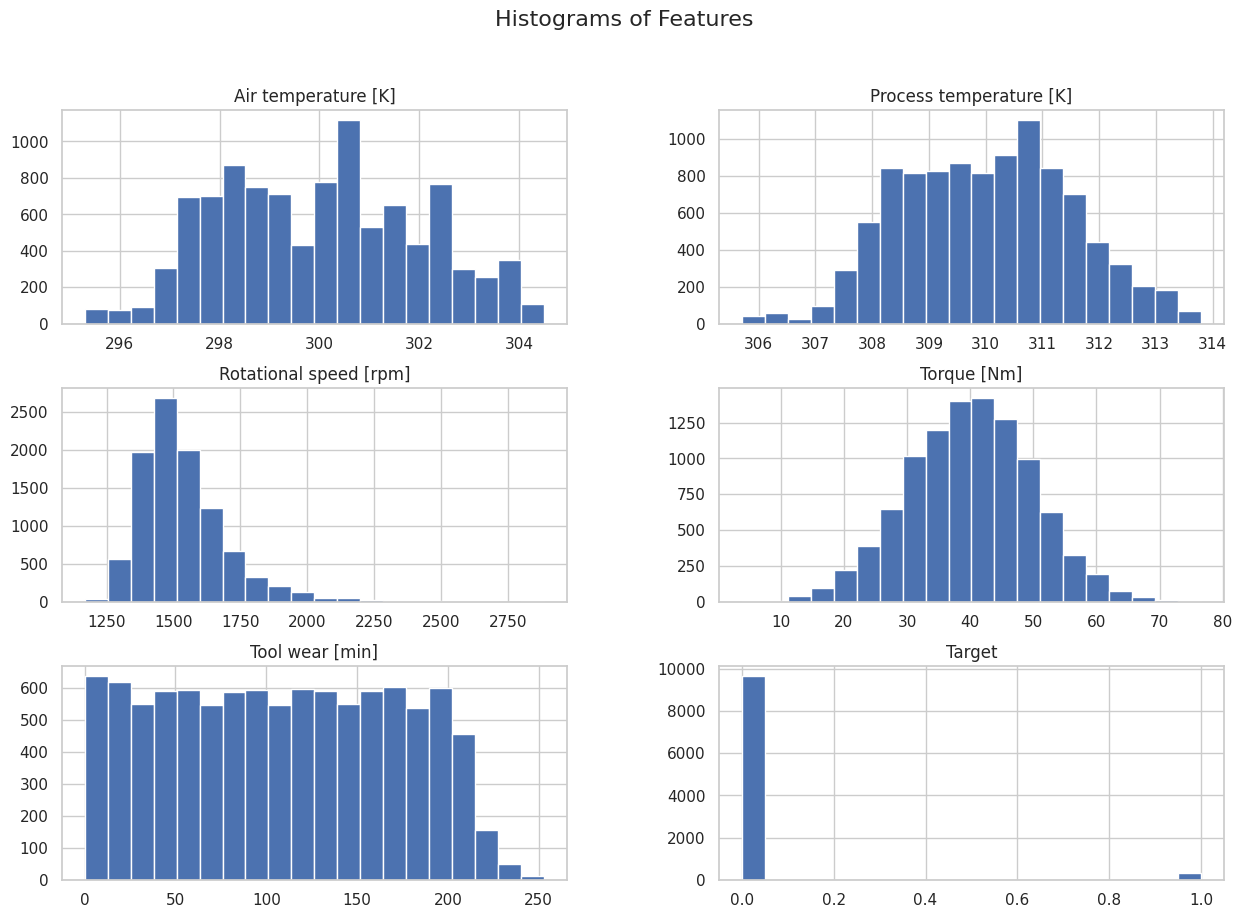

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style='whitegrid')

# Histograms
data.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Features', fontsize=16)
plt.show()

### b. Box Plots
To identify outliers and understand the spread of the data:

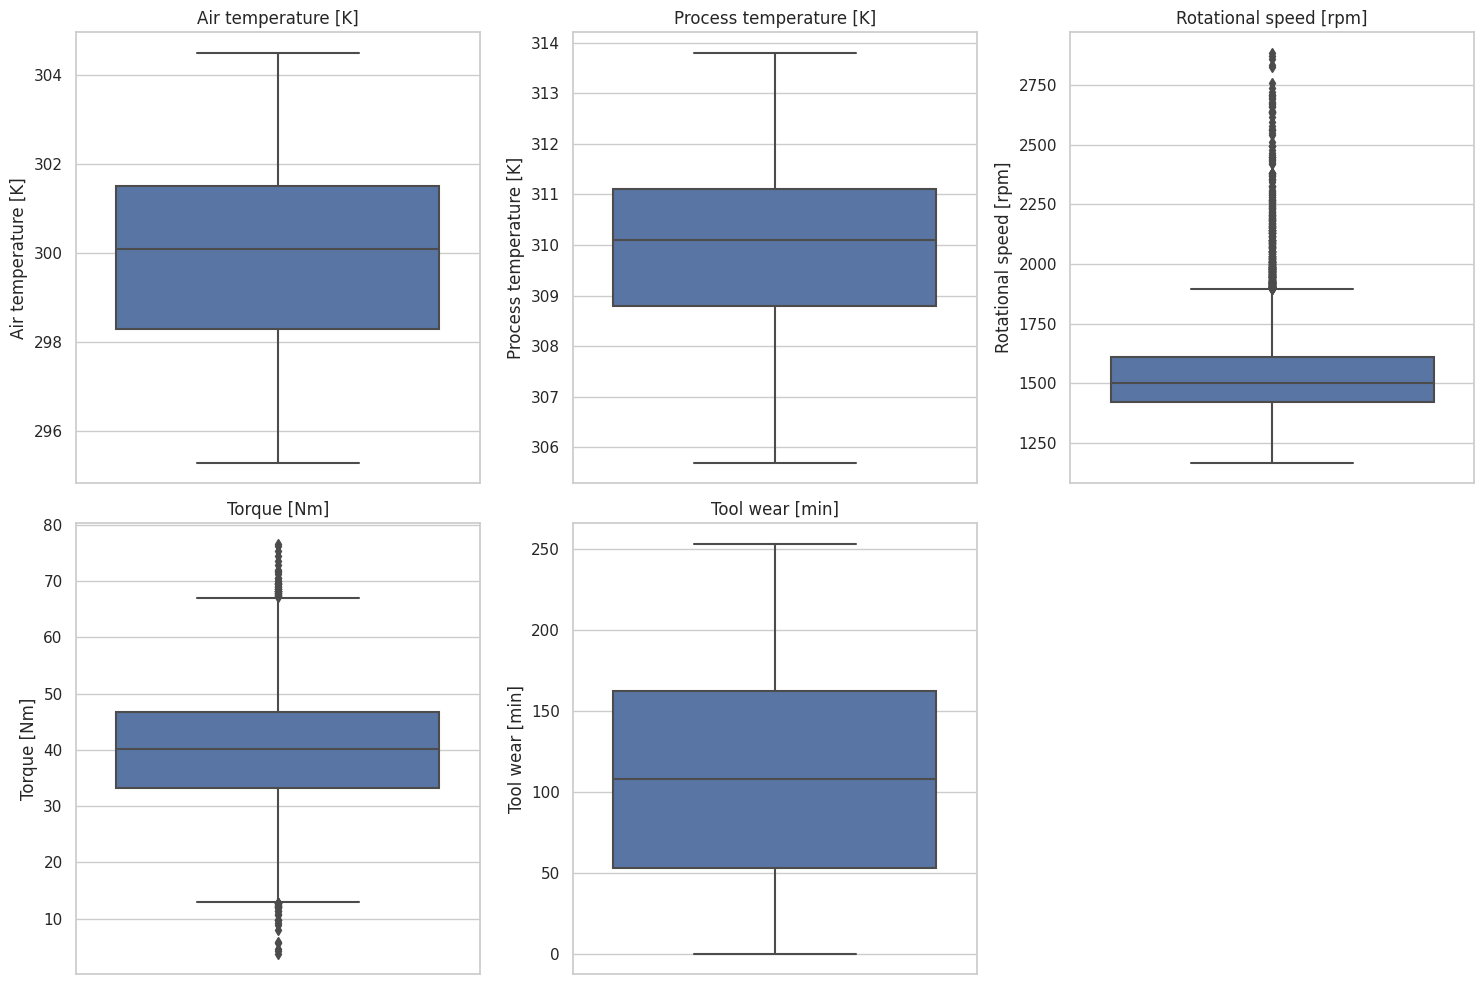

In [8]:
# Box plots for each feature
numeric_data = data.select_dtypes(include=['number'])
numeric_data = numeric_data.drop('Target',axis=1)
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_data.columns, 1):  # Exclude 'Target'
    plt.subplot(2, 3, i)
    sns.boxplot(y=numeric_data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

### c. Correlation heatmap
To identify correlation among various features.

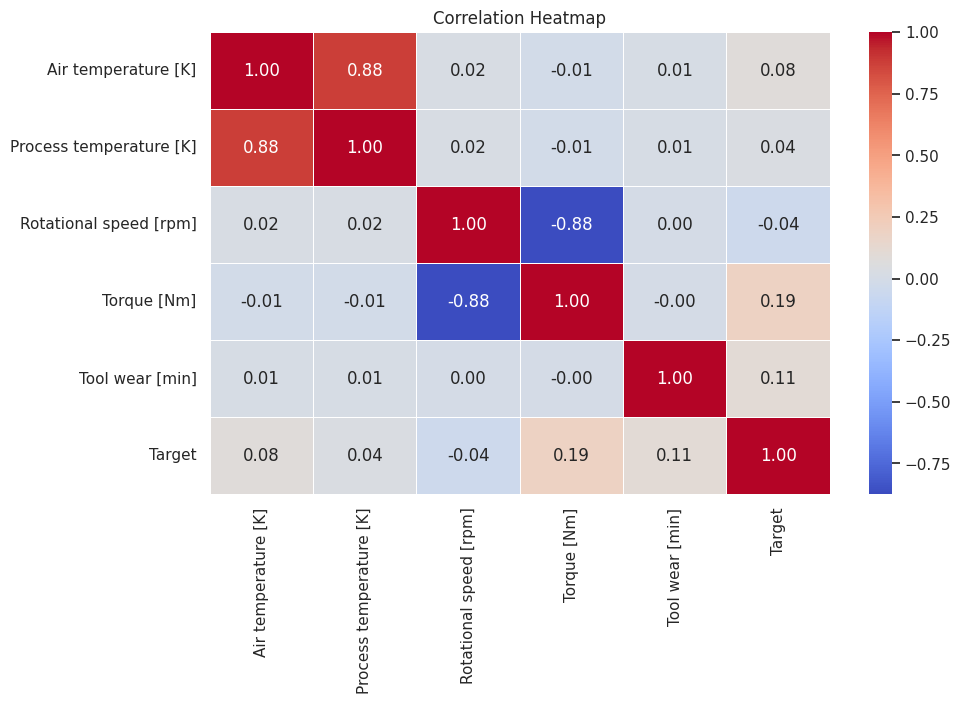

In [9]:
# Correlation heatmap
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 5. Analyze Imbalance in Target Variable
Since the target variable is likely imbalanced, you should analyze its distribution.

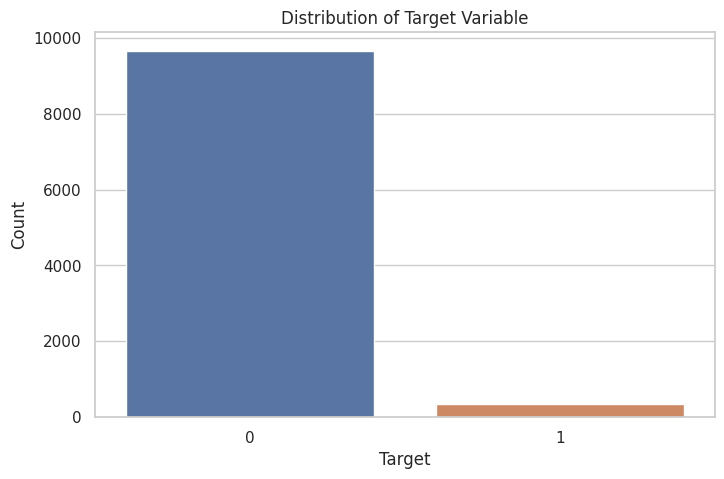

In [10]:
# Countplot of target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Target', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, m

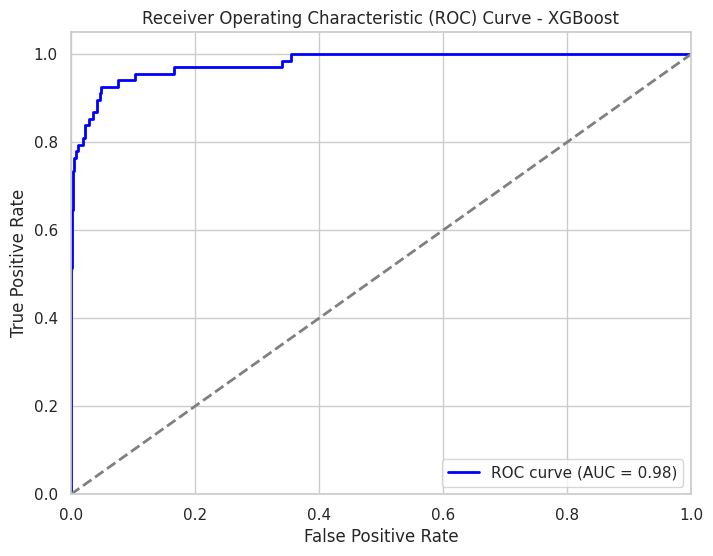

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import xgboost as xgb
import matplotlib.pyplot as plt

# Load and prepare your dataset
# Assuming 'cleaned_data' is your DataFrame after handling anomalies
# Define features (X) and target (y)
X = data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]  # Features
y = data['Target']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost model
model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Predictions
y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]  # Get probability estimates for the positive class

# Set a new classification threshold
threshold = 0.6  # Change this value as needed
y_pred = (y_pred_prob >= threshold).astype(int)  # Apply the new threshold

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Model Accuracy with threshold {threshold}: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### ROC (Receiver Operating Characteristic) curve
The ROC (Receiver Operating Characteristic) curve is a graphical representation used to evaluate the performance of a binary classification model. It shows the trade-off between the true positive rate (sensitivity or recall) and the false positive rate (1 - specificity) at various threshold settings. Here's how to interpret the ROC curve, particularly in relation to the threshold of 0.6:

### Key Concepts:

1. **True Positive Rate (TPR)**: 
   - Also known as **sensitivity** or **recall**, it measures the proportion of actual positive cases that are correctly identified by the model.
   - Formula:  
     $$
\text{TPR} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
     $$

2. **False Positive Rate (FPR)**: 
   - Measures the proportion of actual negative cases that are incorrectly identified as positive.
   - Formula:  
     $$
     \text{FPR} = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}
     $$

3. **Threshold**: 
   - The decision boundary used to classify instances as positive or negative. In your case, a threshold of 0.6 means that if the predicted probability of the positive class is greater than or equal to 0.6, the instance is classified as positive (class 1); otherwise, it is classified as negative (class 0).

### ROC Curve Analysis at 0.6 Threshold:

1. **Point on the ROC Curve**:
   - At the threshold of 0.6, you can calculate the TPR and FPR based on your confusion matrix:
     - **TPR (Recall)**: 44 true positives and 24 false negatives.
       $$
       \text{TPR} = \frac{44}{44 + 24} = \frac{44}{68} \approx 0.65
       $$
     - **FPR**: 4 false positives and 1928 true negatives.
       $$
       \text{FPR} = \frac{4}{4 + 1928} = \frac{4}{1932} \approx 0.00207
       $$

   - This means that, at a threshold of 0.6, your model has a TPR of approximately **0.65** and an FPR of approximately **0.00207**.

2. **Plotting the ROC Curve**:
   - The ROC curve is created by plotting TPR against FPR for various threshold values (from 0 to 1).
   - Each threshold will yield a different TPR and FPR, resulting in a curve that starts at the origin (0,0) and ends at the point (1,1).

3. **Area Under the Curve (AUC)**:
   - The AUC is a single scalar value that summarizes the performance of the model across all thresholds. An AUC of 1 represents a perfect model, while an AUC of 0.5 indicates no discrimination ability (equivalent to random guessing).
   - The closer the ROC curve is to the top-left corner of the plot, the better the model’s performance.

4. **Interpreting the ROC Curve**:
   - A model with a high TPR and a low FPR is generally considered good.
   - By examining the ROC curve and the AUC, you can determine if your model is effective and make decisions about which threshold to use in practice.
   - In your case, while the threshold of 0.6 offers reasonable precision, the associated TPR and FPR provide insight into potential trade-offs in misclassification, especially for the minority class.

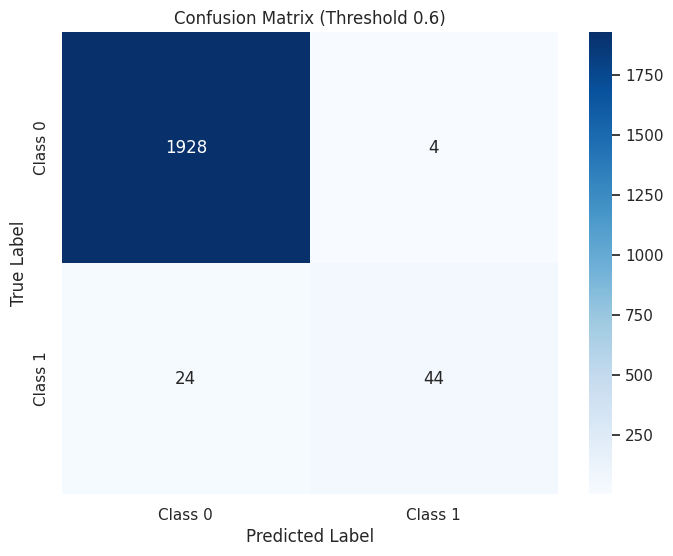

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# True labels: 1932 instances of class 0 and 68 instances of class 1
y_true = [0] * 1932 + [1] * 68  

# Predicted labels: 
# 1928 true negatives, 44 true positives, 4 false positives, 24 false negatives
y_pred = [0] * 1928 + [1] * 4 + [0] * 24 + [1] * 44

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix (Threshold 0.6)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 1. **Overall Model Accuracy**
- **Best Model Accuracy with Threshold 0.6: 0.9860**
  - The model achieves an accuracy of 98.60%, indicating that the model correctly classifies 98.6% of the instances in the dataset. This strong performance suggests that the model is effective, though it's essential to consider additional metrics, especially in cases of class imbalance.

### 2. **Classification Report**
The classification report provides detailed metrics for each class (0 and 1 in this case):

| Metric        | Class 0       | Class 1       | Average       |
|---------------|---------------|---------------|---------------|
| Precision     | 0.99          | 0.92          | 0.95          |
| Recall        | 1.00          | 0.65          | 0.82          |
| F1-Score      | 0.99          | 0.76          | 0.88          |
| Support       | 1932          | 68            | 2000          |

- **Precision**:
  - **Class 0 (Negative class)**: 0.99 means that 99% of the instances classified as class 0 are actually class 0.
  - **Class 1 (Positive class)**: 0.92 means that 92% of the instances classified as class 1 are actually class 1. This high precision suggests fewer false positives compared to the previous model.

- **Recall**:
  - **Class 0**: 1.00 indicates the model correctly identifies all instances of class 0, resulting in no false negatives.
  - **Class 1**: 0.65 means that only 65% of the actual class 1 instances are correctly identified. This lower recall shows that the model is still missing a significant number of positive class instances, leading to 24 false negatives.

- **F1-Score**:
  - The F1-score, which is the harmonic mean of precision and recall, is 0.99 for class 0, indicating excellent performance. For class 1, the F1-score is 0.76, suggesting the model still struggles with this class.

- **Macro Average**: 
  - This average treats all classes equally. The macro precision is 0.95, macro recall is 0.82, and macro F1-score is 0.88, indicating a generally good performance but highlighting the lower recall for the positive class.

- **Weighted Average**:
  - The weighted averages account for class imbalance. In this case, the weighted precision is 0.99, recall is 0.99, and F1-score is 0.98, indicating that overall, the model performs well, primarily due to the majority class (class 0).

### 3. **Confusion Matrix**
```
[[1928    4]
 [  24   44]]
```
- **True Positives (TP)**: 44 (Class 1 correctly predicted)
- **True Negatives (TN)**: 1928 (Class 0 correctly predicted)
- **False Positives (FP)**: 4 (Class 0 incorrectly predicted as class 1)
- **False Negatives (FN)**: 24 (Class 1 incorrectly predicted as class 0)

### Interpretation of the Confusion Matrix:
- **High True Negatives**: The model excels in predicting class 0, with 1928 true negatives and only 4 false positives.
- **Moderate True Positives**: The model correctly identifies 44 out of 68 actual class 1 instances, leading to 24 false negatives. While the model performs well overall, it still misses a notable portion of the positive class instances.
- **Imbalance Issue**: Although there's improvement in precision and recall for class 1 compared to the previous model, the model still shows a tendency to favor the majority class (class 0), resulting in lower recall for class 1.

### Summary:
- The model demonstrates a high overall accuracy of 98.60%, indicating effective classification. However, there remains a challenge in identifying the minority class (class 1), as evidenced by the lower recall and F1-score for that class.
- The confusion matrix reflects strong performance in classifying the majority class while highlighting the need for enhancements in detecting the minority class.
- Strategies to address this issue could include further rebalancing of the dataset (oversampling the minority class or undersampling the majority class), exploring different algorithms, or applying ensemble methods to boost the detection of the minority class.

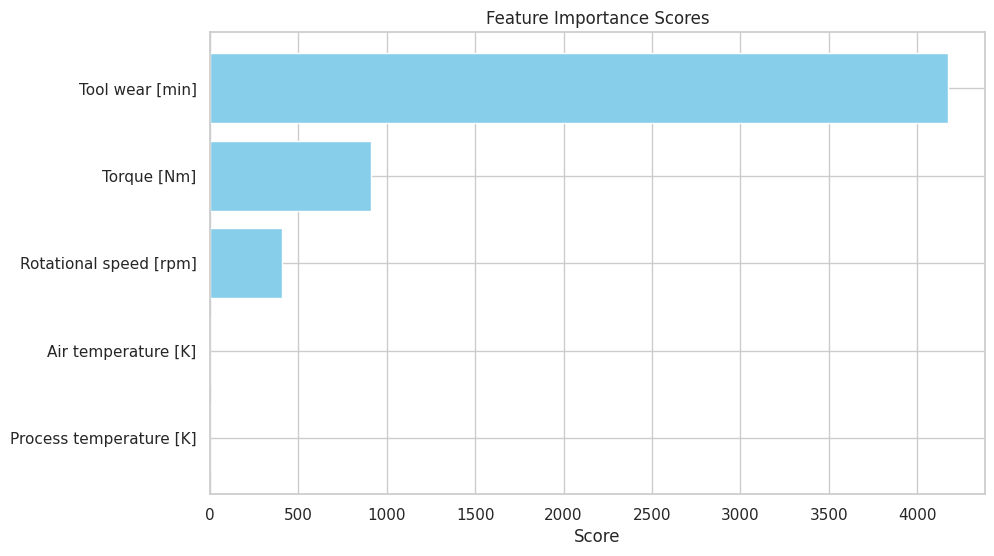

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'cleaned_data' is your DataFrame after cleaning the anomalies
# Define features (X) and target (y)
X = data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]  # Features
y = data['Target']  # Target variable

# Apply SelectKBest with chi2 score function
best_features = SelectKBest(score_func=chi2, k='all')

# Fit and transform the features to get scores
fit = best_features.fit(X, y)

# Create a DataFrame to hold features and their scores
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

# Concatenate scores with feature names
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature', 'Score']

# Sort features by score (ascending)
feature_scores.sort_values(by='Score', ascending=True, inplace=True)

# Plot top features
plt.figure(figsize=(10, 6))
plt.barh(feature_scores['Feature'], feature_scores['Score'], color='skyblue')
plt.xlabel('Score')
plt.title('Feature Importance Scores')
plt.show()

### 1. **Interpretation: Key Predictive Features**
The high bars for **Tool wear [min]**, **Torque [Nm]**, and **Rotational speed [rpm]** suggest that these three features have the highest statistical relationship (correlation) with the target variable in the dataset. In other words, they are the **most important predictors** for the classification or regression task, while the other features (like **Air temperature [K]** and **Process temperature [K]**) have minimal or no contribution to predicting the target.

- **Tool wear [min]**: This feature could be a significant indicator of machine or tool performance degradation, making it a strong predictor of outcomes related to wear or malfunction.
- **Torque [Nm]**: Torque represents the force applied during operations, and high variance in torque might correspond to specific operational states that affect the target.
- **Rotational speed [rpm]**: Changes in rotational speed might heavily influence machine performance, making it a valuable predictor.

### 2. **Interpretation: Feature Redundancy or Irrelevance**
The 0 scores for **Air temperature [K]** and **Process temperature [K]** may indicate that these features do not significantly contribute to the target prediction in this dataset. This might happen for several reasons:
   - **Redundancy**: These features might not be providing new or relevant information that the model doesn't already capture from other features.
   - **Irrelevance**: These features may not affect the target variable in a meaningful way, either because they are unrelated or have a negligible impact on the outcome.

### Graph Interpretation:
- **Rotational speed [rpm]**, **Torque [Nm]**, and **Tool wear [min]** have significant bars indicating these are the key features the model relies on.
- **Air temperature [K]** and **Process temperature [K]** have no score, suggesting they do not contribute to the target prediction.

### Potential Reasons:
- **Correlated Features**: If **Air temperature [K]** and **Process temperature [K]** are highly correlated with other features, the model might prioritize the other features with a stronger influence.
- **Domain-Specific Insights**: In the context of industrial machines or systems, factors like **Torque**, **Rotational speed**, and **Tool wear** are more directly related to machine performance or failure, whereas temperature might have less of an impact depending on the use case.